# Machine Learning in Python - Group Project 2

**Due Friday, April 14th by 16.00 pm.**

------------Assignment Group 43-------------------

Contributors: Yifan Hu, Jing Pan, Jialong He 
 

## General Setup

In [1]:
# Add any additional libraries or submodules below

# Display plots inline
%matplotlib inline

# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn modules
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

In [2]:
# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

In [3]:
# Load data
d = pd.read_csv("hotel.csv")

In [4]:
d.head()

,is_canceled,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0,Resort Hotel,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0
1,0,Resort Hotel,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0
2,0,Resort Hotel,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0
3,0,Resort Hotel,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0
4,0,Resort Hotel,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1


## 1. Introduction


With the rapid development of the tourism industry, the hotel industry has also seen a significant increase in demand for hotel rooms. However, there are still instances where tourists cancel their bookings, causing a significant impact on the hotel's revenue and operations. Therefore, it is crucial to understand the factors that lead to cancellation for the purpose of minimising the potential loss of hotels.  

Our goal is to identify these factors and find a suitable model which can do prediction porperly. The data we used is collected on hotel bookings (Antonio, Almeida and Nunes,2019) with large observations (119,390) and several missing values, thus we still need to check the data quality initially. The data describes two real hotels in Portugal, a resort in the Algarve region and a hotel in the city of Lisbon, and reflects bookings made between July 1st, 2015 through August 31st 2017.  

We will firstly perform the normal exploratory data analysis and choose to explore the binary logistic regression modelling method into the dataset and finally propose relative conclusions and recommendations to ameliorate above impact. The model with the highest test accuracy and its corresponding hyperparameters for predicting whether or not a booking will be canceled is selected as our final predictive model.

## 2. Exploratory Data Analysis and Feature Engineering

In [5]:
display(d.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

None

>The dataset contains 30 features and 119,390 observations.  
There are three types of features: int64; object and float64. The numeric features are the majority.  
There is a small problem that the type of `children` is 'float64'. We will convert it into the type of 'int64' later.

In [6]:
d.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


Some statistics of the dataset.

In [7]:
#check duplicated value
print("There are {} duplicated observations".format(d.duplicated().sum()))

There are 32252 duplicated observations


>When we check for the duplication, we find that our dataset does contain duplicates!  
However, it is possible that multiple bookings with the same features were made on the same say. Since we do not have a feature such as "booking reference number", we cannot say for sure that those are true duplicates and so we decide to keep them.  


In [8]:
#check missing value
display(d.isna().sum())

is_canceled                            0
hotel                                  0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

> There are 4 missing values in `children`, 488 missing values in `country`, 16340 missing values in `agent` and 112593 missing values in `company`. 

In [9]:
# delete following columns
data = d.drop(['hotel', 'country', 'agent', 'company', 'arrival_date_year', 'arrival_date_month', 
               'arrival_date_week_number','arrival_date_day_of_month'], axis=1)

# delete the 4 rows for the missing values in "children" 
data = data.dropna(subset=['children'])
data.children = data.children.astype(int) # convert the type of "children" from float64 into int64

data.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,0,0,2,0,0,BB,Direct,Direct,...,0,C,C,3,No Deposit,0,Transient,0.0,0,0
1,0,737,0,0,2,0,0,BB,Direct,Direct,...,0,C,C,4,No Deposit,0,Transient,0.0,0,0
2,0,7,0,1,1,0,0,BB,Direct,Direct,...,0,A,C,0,No Deposit,0,Transient,75.0,0,0
3,0,13,0,1,1,0,0,BB,Corporate,Corporate,...,0,A,A,0,No Deposit,0,Transient,75.0,0,0
4,0,14,0,2,2,0,0,BB,Online TA,TA/TO,...,0,A,A,0,No Deposit,0,Transient,98.0,0,1


> We subjectly delete several features in the above mainly because we do not think these feature would have any impact in the final prediciton and for simplicity in later process.  
For example, we are not interested if someone will cancel the booking of one certain type of hotel so we see the two types as just one.  
4 missing values in `children` are manually deleted since they account for very little and have almost no impact on the dataset. In addition, its data type was converted from floating number into integer number.

In [10]:
# check that no missing values remain:
data.isnull().sum().sum()

0

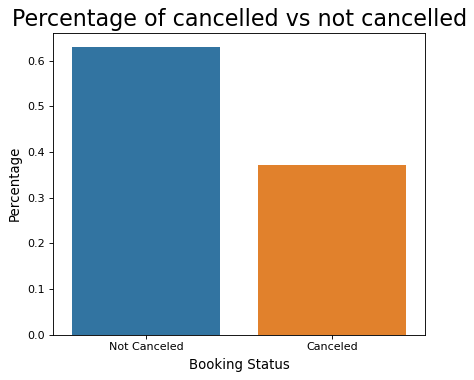

In [11]:
# Visualizing the percentage of canceled vs not canceled bookings: 
plt.figure(figsize=(6, 5))
plt.title("Percentage of cancelled vs not cancelled", fontsize = 20)
sns.barplot(x=data['is_canceled'].unique(), y=data['is_canceled'].value_counts(normalize=True))
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])
plt.show()

>From the above graph, we see that around 65% of total bookings is not cancelled and 35% is cancelled.

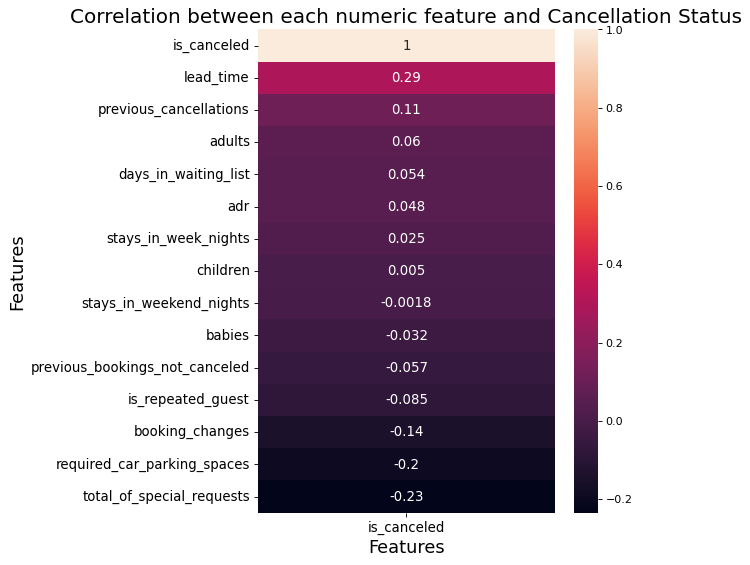

In [12]:
# Visualizing correlation coefficients between features and cancellation:
fig = plt.figure(figsize=(6,8))
ax = sns.heatmap(data.corr()[['is_canceled']].sort_values('is_canceled', ascending=False), annot = True, annot_kws = {"size":12})
ax.set_title('Correlation between each numeric feature and Cancellation Status', fontsize=18)
ax.set_xlabel('Features', fontsize = 16)
ax.set_ylabel('Features', fontsize = 16)
ax.tick_params(axis = "both", labelsize = 12);
plt.show()

From the above correlation heatmap, there are some intuitive results we could derive.  
1. `lead_time` is the most highly (postively) correlated feature with target variable `is_canceled`. It makes sense that as the number of days between when the booking is made and the supposed arrival date increases, customers have more time and chance to cancel a reservation.  
2. `previous_cancellations` (measured by the number of a customer's previous cancellations) is the second highly correlated with whether or not the current booking will be canceled.  
3. `total_of_special_requests` is the most negatively correlated feature with `is_canceled`. It is reasonable that as the number of special requests made increases, the likelihood that a booking is canceled decreases. This suggests that engagement with the hotel prior to arrival and feeling like their needs are heard may make a customer less likely to cancel their reservation.  
4. Similarly to special requests, `required_car_parking_spaces` is the second most negatively correlated feature with `is_canceled`. As the number of parking spaces requests increases, the likelihood that a booking is canceled decreases.     


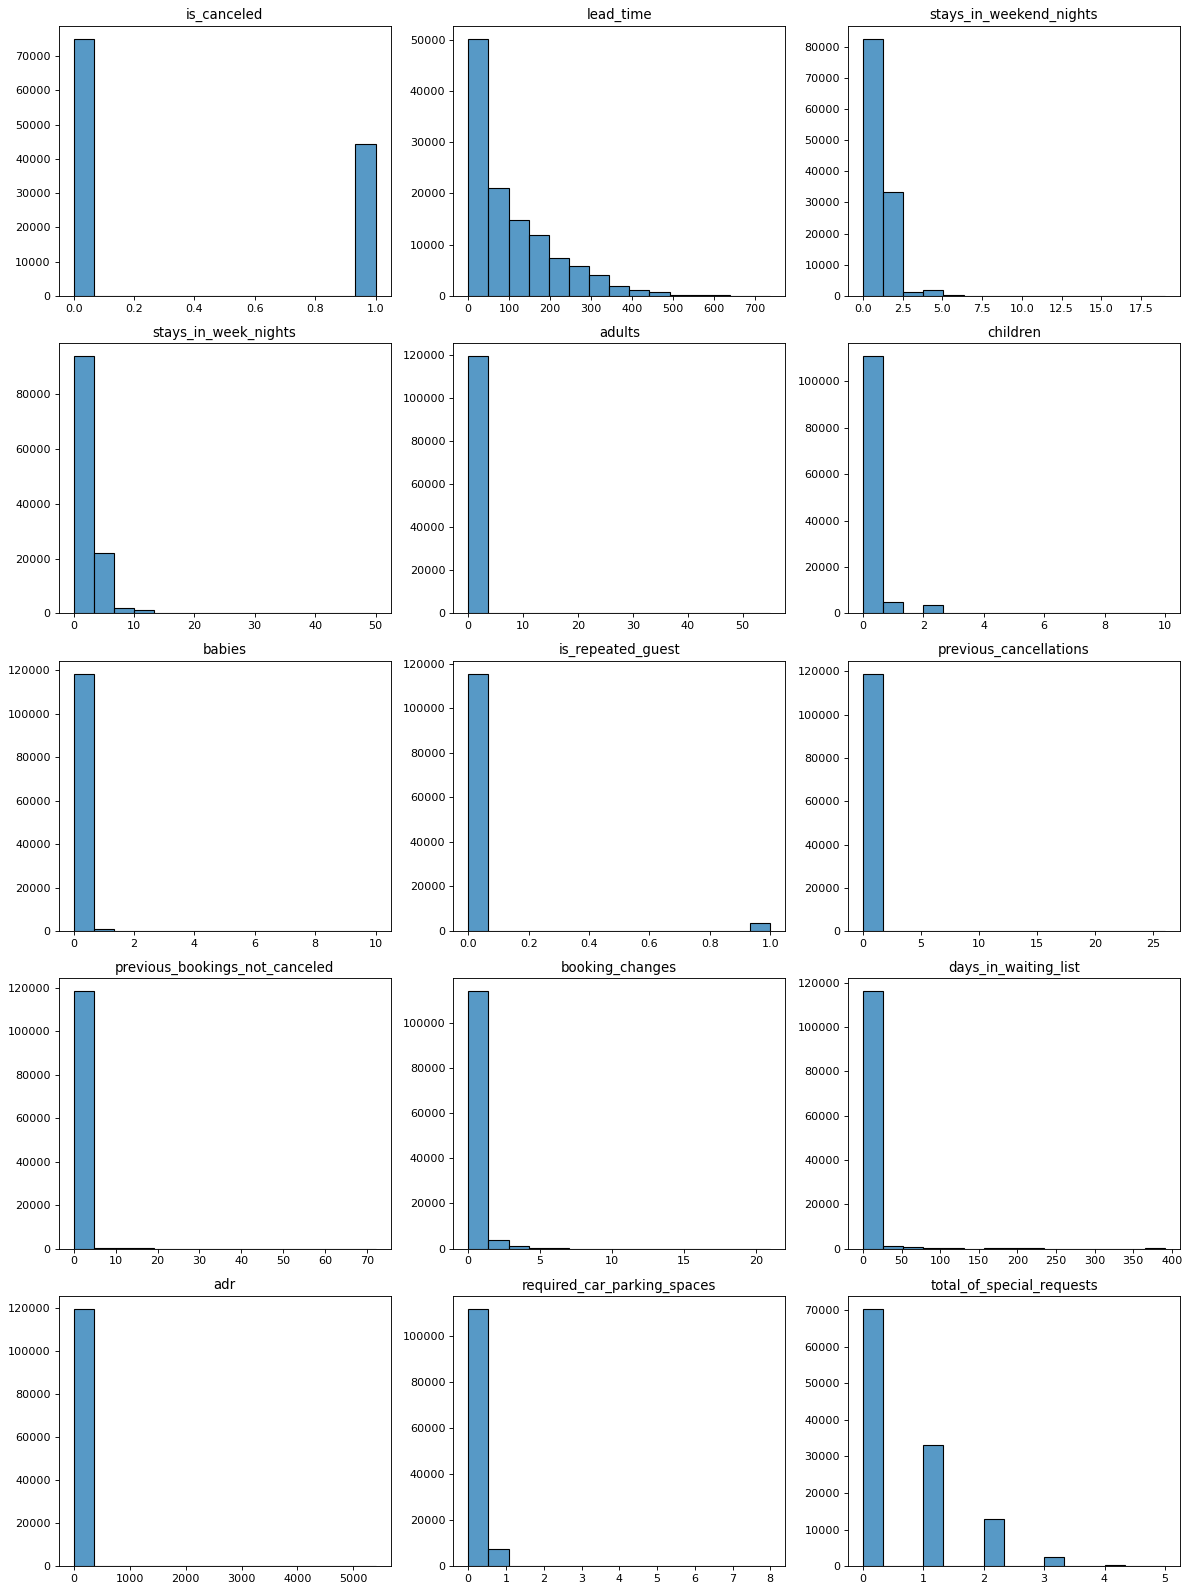

In [13]:
#obtain all numeric variable names
axes = []
for i in range(data.shape[1]):
    if data.iloc[:, i].dtypes != "object":
        axes.append(data.columns[i])
data_numeric = data[axes]

#histogram for each numeric columns
fig, axes = plt.subplots(figsize=(15,20), ncols=3, nrows=5)
axes = axes.flatten()

for i, ax in enumerate(axes):
    sns.histplot(data = data_numeric.iloc[:, i],bins=15, ax=ax)
    ax.set_title(data_numeric.iloc[:,i].name)
    ax.set_ylabel("")
    ax.set_xlabel("")

plt.tight_layout()
plt.show()

Just have a quick look at these histograms for all numerical features.  

We see that a lot of features only contain a few (say, less than 5) feature values. Many of them are binary features which will make the modelling and analysis more easy.  

One histogram needs to be noticed is the "adr" one. It seems there are some outliers gravely affecting the hist.

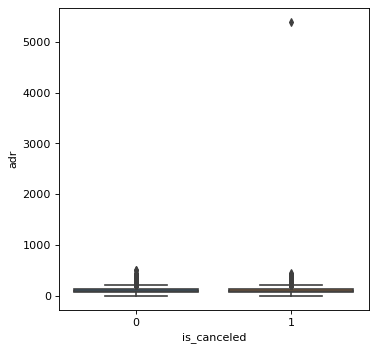

In [14]:
# check outliers for "adr"
plt.figure(figsize=(5, 5))
sns.boxplot(data = data, x = "is_canceled", y="adr")
plt.show()

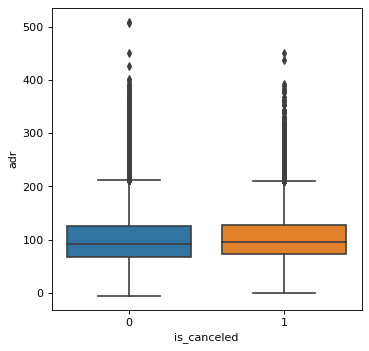

In [15]:
# exclude outlier
ind= data['adr']>5000
data= data.loc[-ind,] 
# check again
plt.figure(figsize=(5, 5))
sns.boxplot(data = data, x = "is_canceled", y="adr")
plt.show()

After removing the outliers (value greater than 5000), the boxplot seems much more pleasing.

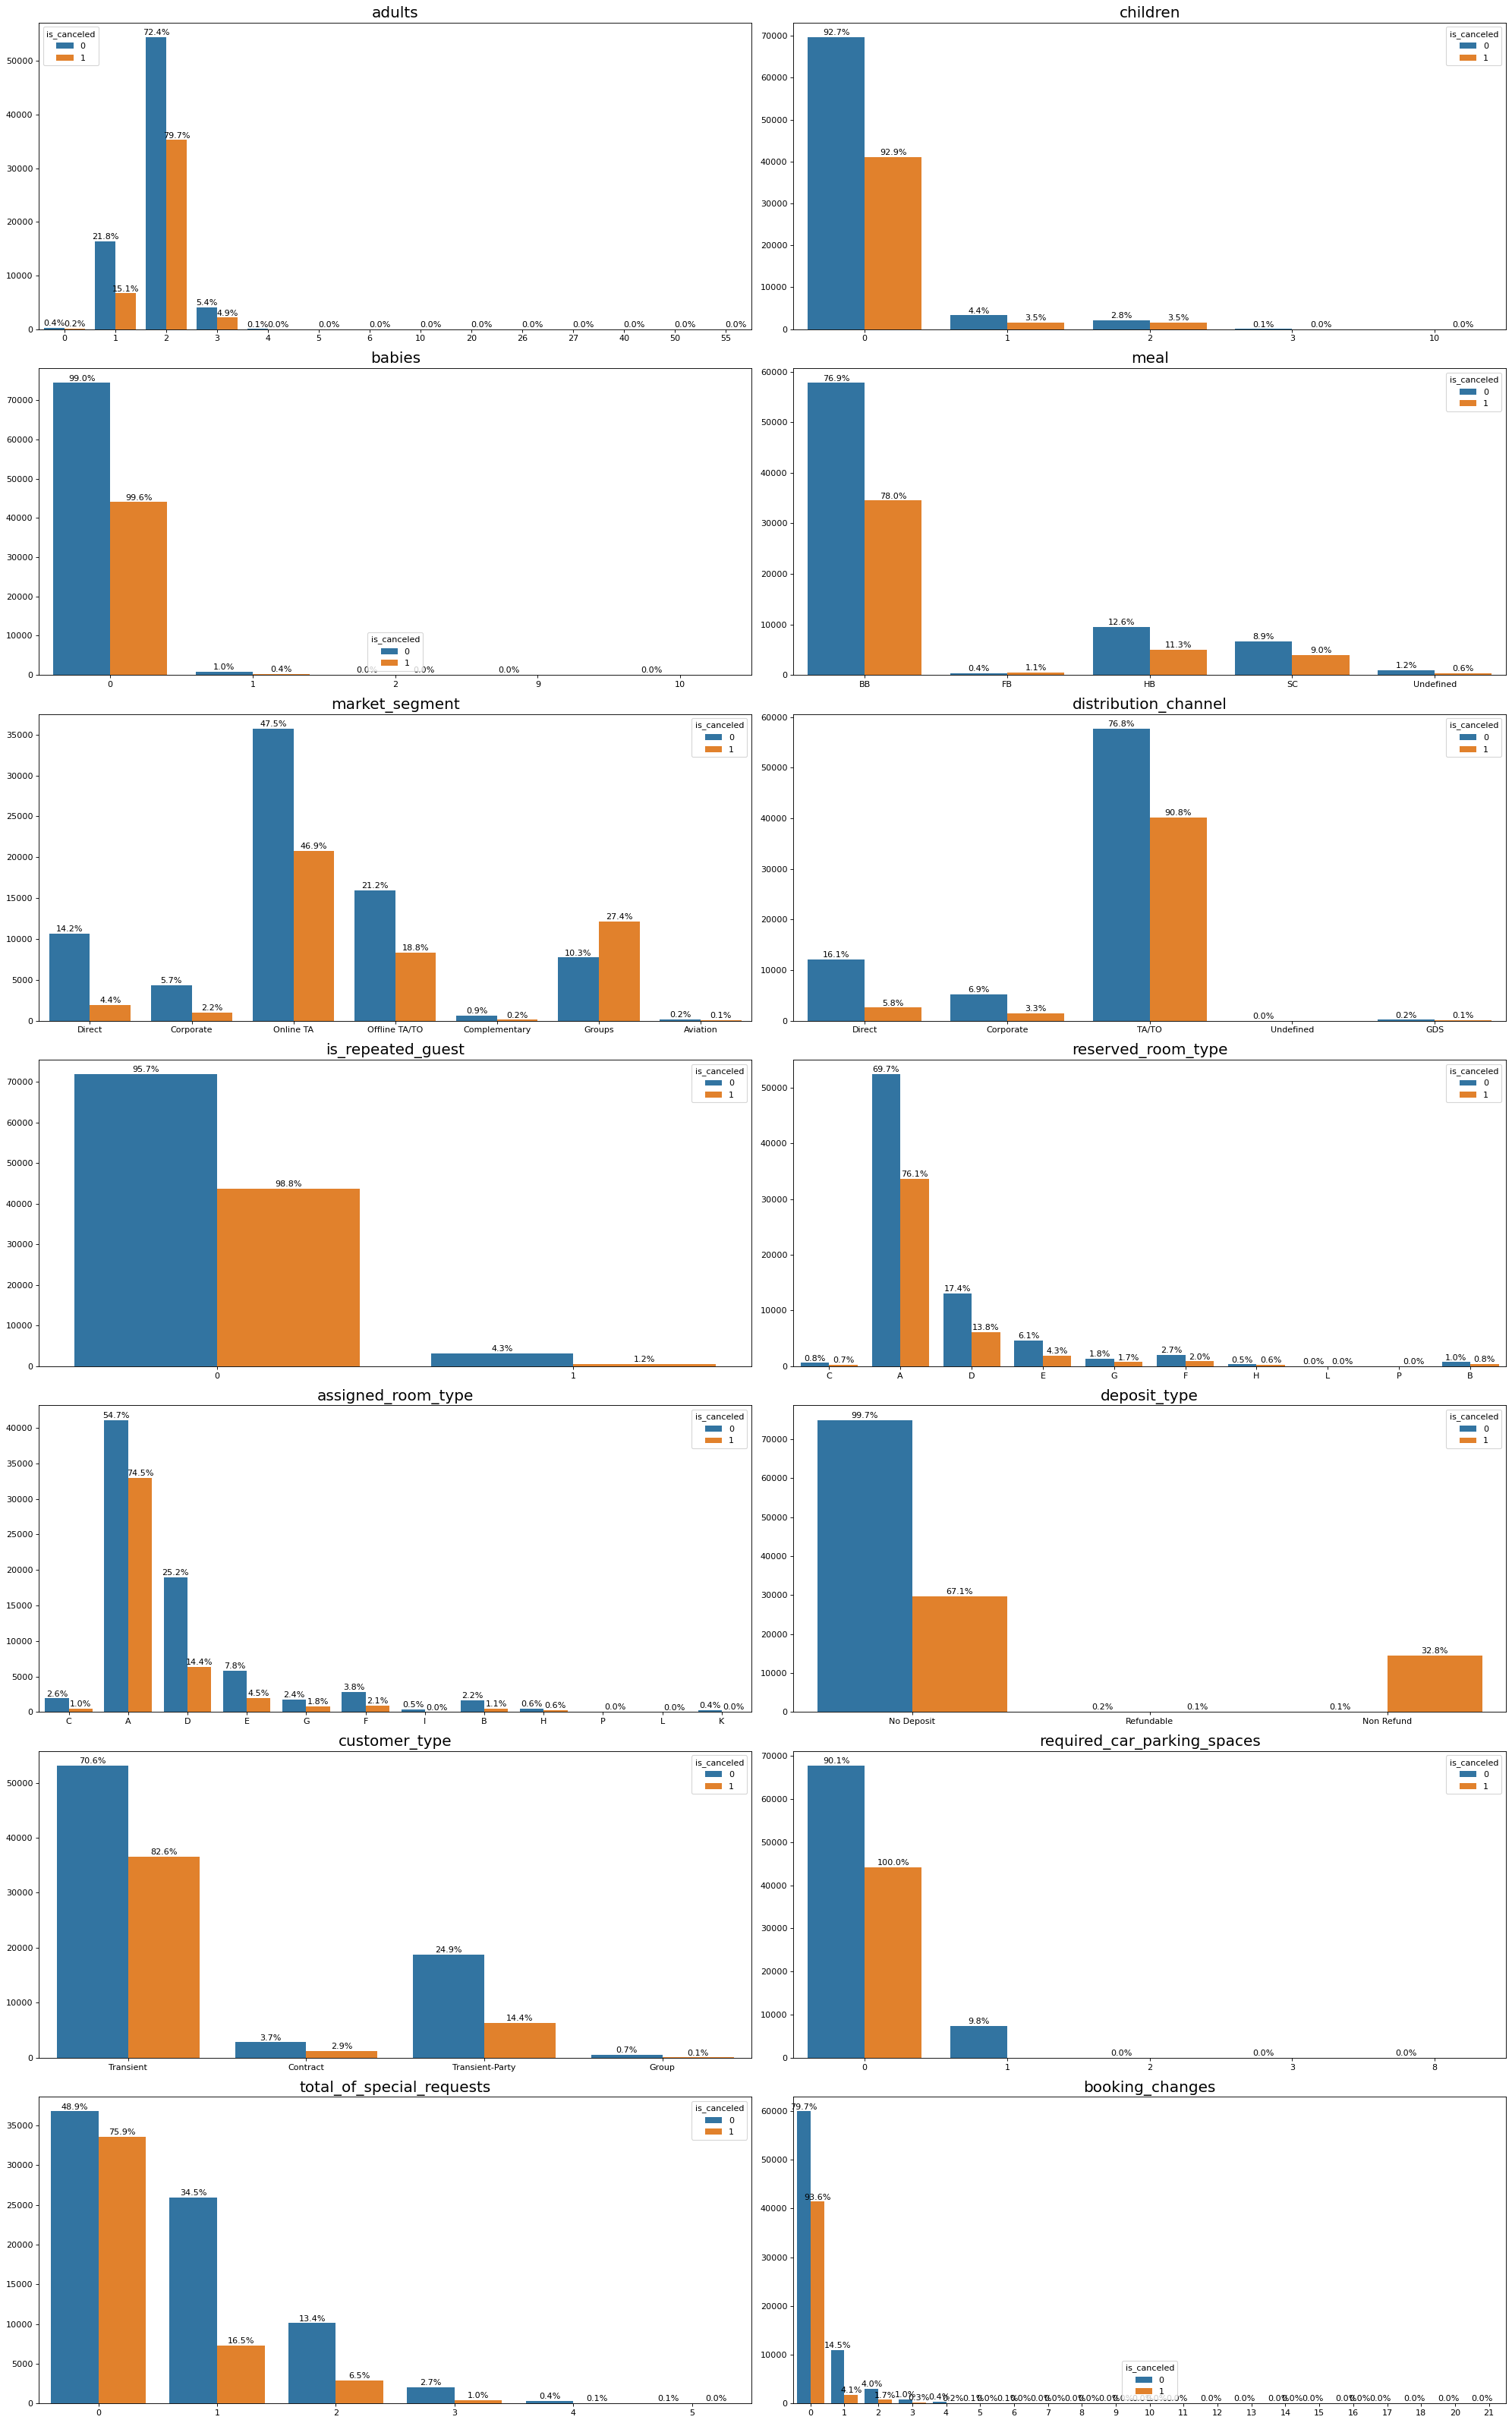

In [16]:
# choose some columns and have a quick look again
axes=['adults','children','babies','meal','market_segment','distribution_channel',
      'is_repeated_guest','reserved_room_type','assigned_room_type','deposit_type','customer_type',
      'required_car_parking_spaces','total_of_special_requests','booking_changes']
data_numeric = data[axes]


fig, axes = plt.subplots(figsize=(25,40), ncols=2, nrows=7)
axes = axes.flatten()

for i, ax in enumerate(axes):
    sns.countplot(x=data_numeric.columns[i], hue="is_canceled", data=data,ax=ax)
    for bars in ax.containers:
        if bars.get_label() == '0':
            group_total = sum(data['is_canceled']==0)
        else:
            group_total = sum(data['is_canceled']==1)
        for p in bars.patches:
            # print(p.get_facecolor(), p.get_label())
            percentage = f'{100 * p.get_height()/group_total:.1f}%\n'
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='center')
    ax.set_title(data_numeric.iloc[:,i].name, fontsize=18)
    ax.set_ylabel("")
    ax.set_xlabel("")
plt.tight_layout()
plt.show()

Just a first quick look at majority features' distribution since there are too many of them.  
We will have a careful look at some variables individually next!

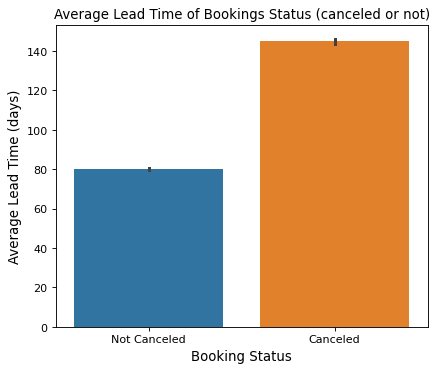

In [17]:
# see column "lead_time"
plt.figure(figsize=(6, 5))
plt.title("Average Lead Time of Bookings Status (canceled or not)")
sns.barplot(x=data['is_canceled'], y=data['lead_time'])
plt.xlabel("Booking Status", fontsize = 12)
plt.ylabel("Average Lead Time (days)", fontsize = 12)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])
plt.show()

**Interpretation:**  
Canceled bookings tend to have a longer lead time on average. So, we could infer that a customer makes a booking quite early is more likely to make a cancellation in the future days.

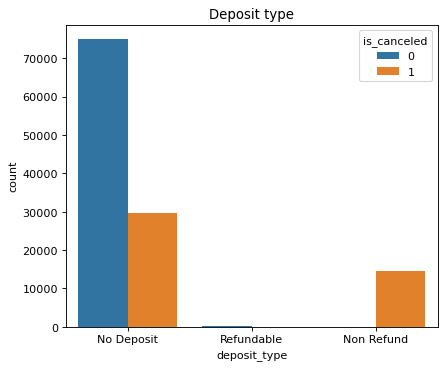

In [18]:
# see column "deposit_type"
plt.figure(figsize=(6, 5))
sns.countplot(x=data.deposit_type, hue="is_canceled", data=data).set(title='Deposit type')
plt.show()

**Interpretation:**  
Surprisingly, customers who pay a non-refundable deposit have a much higher percentage of canceled reservations.  
This is a quite counter-intuitive finding, we do not know why causes this.

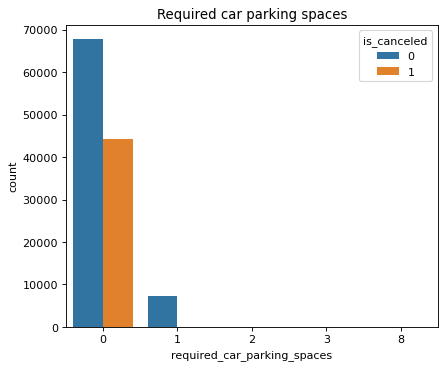

In [19]:
# see column "required_car_parking_spaces"
plt.figure(figsize=(6, 5))
sns.countplot(x=data.required_car_parking_spaces, 
              hue="is_canceled", data=data).set(title='Required car parking spaces')
plt.show()

**Interpretation:**  
Customers who have no requirements for parking spaces tend to cancel their booking from the above histogram. Although there are few observations when the requirement for parking spaces greater than 1, we could intuitively guess that those customers tend not to cancel their bookings since their specific requirements.   
Similarly guess to the number of special requests (feature `total_of_special_requests`), it would make sense that the more a customer request, the less likely they are to cancel. 

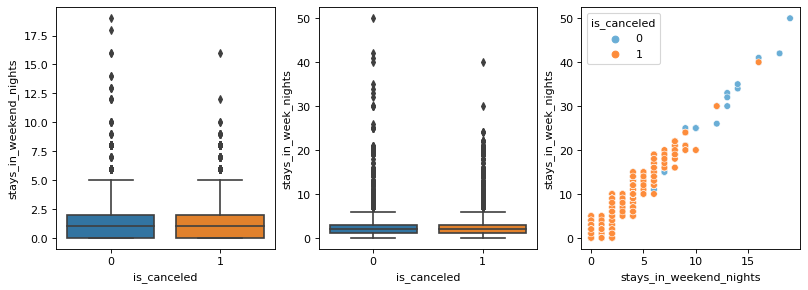

In [20]:
fig,axes=plt.subplots(figsize=(12,4), ncols=3, nrows=1)
sns.boxplot(data = data, x = "is_canceled", y="stays_in_weekend_nights",ax=axes[0])
sns.boxplot(data = data, x = "is_canceled", y="stays_in_week_nights",ax=axes[1])

sns.scatterplot(data = data[data['is_canceled']==0], x="stays_in_weekend_nights",
                y="stays_in_week_nights", hue="is_canceled", palette='Blues',ax=axes[2])
sns.scatterplot(data = data[data['is_canceled']==1], x="stays_in_weekend_nights",
                y="stays_in_week_nights", hue="is_canceled", palette='Oranges',ax=axes[2])
plt.show()

**Interpretation:**  
The third scatterplot shows a strong correlation between `stays_in_weekend_nights` and `stays_in_week_nights`, so we could choose one of them in our later desgin matrix **X**.    

And the boxplots show that `stays_in_week_nights` presents more difference between if a booking is canceled or not. So, `stays_in_week_nights` is more representative and we will include it in our design matrix **X**.   

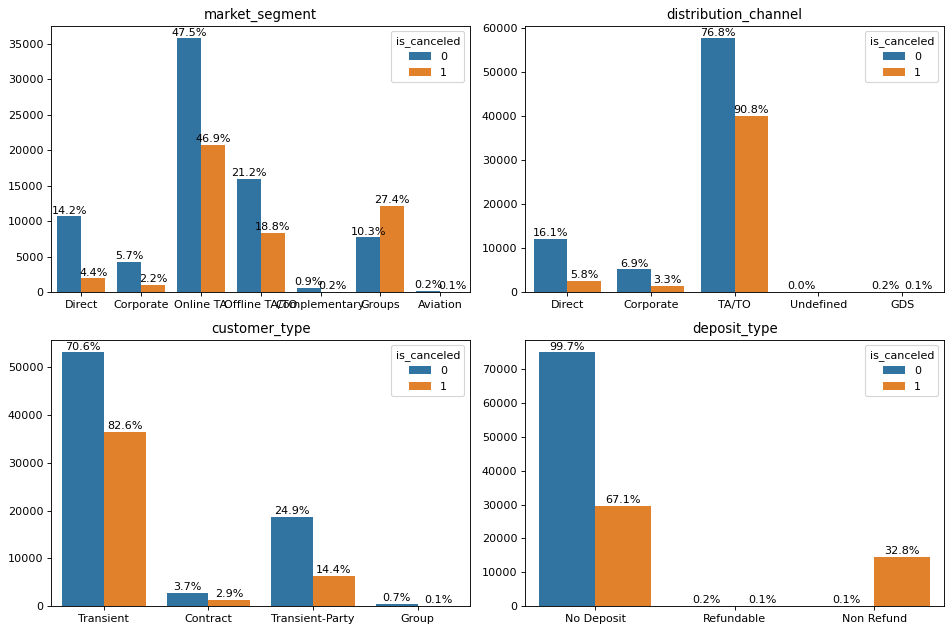

In [21]:
axes=['market_segment','distribution_channel','customer_type',"deposit_type"]
data_numeric = data[axes]


fig, axes = plt.subplots(figsize=(12,8), ncols=2, nrows=2)
axes = axes.flatten()

for i, ax in enumerate(axes):
    sns.countplot(x=data_numeric.columns[i], hue="is_canceled", data=data,ax=ax)
    for bars in ax.containers:
        if bars.get_label() == '0':
            group_total = sum(data['is_canceled']==0)
        else:
            group_total = sum(data['is_canceled']==1)
        for p in bars.patches:
            # print(p.get_facecolor(), p.get_label())
            percentage = f'{100 * p.get_height()/group_total:.1f}%\n'
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='center')
    ax.set_title(data_numeric.iloc[:,i].name)
    ax.set_ylabel("")
    ax.set_xlabel("")
plt.tight_layout()
plt.show()

There are four features `market_segment`, `distribution_channel`, `deposit_type` and `customer_type` which we will make some special changes. We only consider some main categories of these 4 features because some catogories has very few observations and we can think they have no effect on prediction.  

For example, let's see the histogram of `distribution_channel`. The categories "Undefined" and "GDS" takes up very few part of the whole data. So, we do not consider these two categories and only encode the left ones. Use the same idea in `deposit_type`, we only consider categories "Non Refund" and "No Deposit" since there is few "Refundable" values.  

Similar handling to other two features.

In [22]:
# some special encoding to following four specific columns: 
# if type coincide, assign 1, else 0
for i in ['Direct','Online TA','Offline TA/TO','Corporate','Groups']: 
    data['mkt_'+i] = (data['market_segment'] == i).astype(int)
for i in ['Direct','TA/TO','Corporate']: 
    data['dist_'+i] = (data['distribution_channel'] == i).astype(int)
for i in ['Transient','Transient-Party']: 
    data['customer_'+i] = (data['customer_type'] == i).astype(int)
for i in ["Non Refund", "No Deposit"]:
    data["deposit_type_"+i] = (data["deposit_type"] == i).astype(int)
    
data = data.drop(['customer_type','distribution_channel',
                  'market_segment',"deposit_type"], axis=1) # these 4 columns can be deleted
data.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,is_repeated_guest,previous_cancellations,...,mkt_Offline TA/TO,mkt_Corporate,mkt_Groups,dist_Direct,dist_TA/TO,dist_Corporate,customer_Transient,customer_Transient-Party,deposit_type_Non Refund,deposit_type_No Deposit
0,0,342,0,0,2,0,0,BB,0,0,...,0,0,0,1,0,0,1,0,0,1
1,0,737,0,0,2,0,0,BB,0,0,...,0,0,0,1,0,0,1,0,0,1
2,0,7,0,1,1,0,0,BB,0,0,...,0,0,0,1,0,0,1,0,0,1
3,0,13,0,1,1,0,0,BB,0,0,...,0,1,0,0,0,1,1,0,0,1
4,0,14,0,2,2,0,0,BB,0,0,...,0,0,0,0,1,0,1,0,0,1


In [23]:
# create a new column "type_equal_yes" 
# if 'reserved_room_type' = 'assigned_room_type', yes=1, no=0
data["type_equal_yes"] = data['reserved_room_type']==data['reserved_room_type'] 
data["type_equal_yes"] = data["type_equal_yes"].astype(int)
data = data.drop(['reserved_room_type','assigned_room_type'], axis=1)# these two columns are useless now

data["meal"].replace("Undefined", "SC", inplace=True) # replace "Undefined" with "SC", they both means no meal package

`reserved_room_type` and `reserved_room_type` are another two columns we do not think they are useful if we consider them separately.  
However, the combination of them may have some influence.  

**Our assumption** is that if a room assigned is not the same as the reserved room type, the customer might want to cancel the booking.   

So, we decide to combine these two features into one: if two types are the same, we assign 1 to the column `type_equal_yes` or 0 as what we did above.   
We could verify if values=0 could make customers more likely to cancel their books.

In [24]:
# dummy coding for column 'meal'
data = pd.get_dummies(data, columns=['meal'])

Finally five categorical features are encoded by our choice:  
1 `customer_type` --------------> 2 categories ('Transient'; 'Transient-Party')  
2 `distribution_channel`-----> 3 categories ('Direct'; 'TA/TO'; 'Corporate')   
3 `market_segment`-------------> 5 categories ('Direct'; 'Online TA'; 'Offline TA/TO'; ,'Corporate'; 'Groups')   
4 `meal`---------------------------> 4 categories ('BB'; 'FB'; 'HB'; 'SC')  
5 `deposit_type`---------------> 2 categories ('No Deposit'; 'Non Refund')  

Until now, all (31) features in the 'data' are numerical variables which means the feature engineering is finished and we may proceed to the next step of modelling.

In [25]:
# the outcome variable
y = data.is_canceled
# the design matrix
X = data.drop(["is_canceled"], axis=1)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 1, stratify = y)

In [26]:
X_train .head()


,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,...,dist_Corporate,customer_Transient,customer_Transient-Party,deposit_type_Non Refund,deposit_type_No Deposit,type_equal_yes,meal_BB,meal_FB,meal_HB,meal_SC
1116,22,2,5,2,2,0,0,0,0,1,...,0,1,0,0,1,1,0,0,1,0
93296,104,0,1,2,0,0,0,0,0,0,...,0,1,0,0,1,1,1,0,0,0
14126,0,0,1,2,0,0,0,0,2,0,...,0,1,0,0,1,1,1,0,0,0
113039,7,0,1,1,0,0,0,0,0,0,...,1,1,0,0,1,1,1,0,0,0
35497,47,2,5,2,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0


## 3. Model Fitting and Tuning

In [27]:
# the proportion of 'is_canceled' in training and testing set
print(pd.Series(y_train).value_counts(normalize=True))
print(pd.Series(y_test).value_counts(normalize=True))

0    0.629611
1    0.370389
Name: is_canceled, dtype: float64
0    0.629607
1    0.370393
Name: is_canceled, dtype: float64


To examine the proportion of the hotel is cancelled or not is the same for trainset and testset. Ensure the balance.

In [28]:
from sklearn.linear_model import LogisticRegression
# no penalty
logfit = LogisticRegression(random_state=42, solver='liblinear').fit(X_train, y_train)

print(logfit.score(X_test,y_test))

0.8090797408979227


With default penalty ('l2') and default regularization strength (C=1), fit a binary logistic regression model to the training set and state the accuracy score of the model over the test set.   
The printed result (0.8091) is the logistic score representing the accuracy for the prediction in the test set with the model trained in the train set. We could see that around 80.91% of the samples in the test set were classified into the "right" class compared with the reality outcome, `is_canceled`. And we could say it is a quite good performance as a beginning.  
Later, we will change the regularization strength (C) and see if there is any improvement!

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

#In terms of testing data 
print("MSE of the fitted model:", mean_squared_error(y_test, logfit.predict(X_test)))
print("Accuracy of the fitted model:", accuracy_score(y_test, logfit.predict(X_test)))
print("AUC of the fitted model:", roc_auc_score(y_test, logfit.predict(X_test)))



MSE of the fitted model: 0.19092025910207727
Accuracy of the fitted model: 0.8090797408979227
AUC of the fitted model: 0.7653633532264765


The MSE seems a bit high while the accuracy and AUC seem reasonable. We need to check the quantities in confusion matrix for fair assessment.  
Besides, the above model used only one training data set, so we need the cross-validation method to move further.

In [30]:
# the helper function originates from week6 WS
# tidy the output into a dataframe
# We could use for getting the summary of cross-validation results later
def tidy_scores(score_dict):
    df = pd.DataFrame(score_dict)
    df.loc['mean'] = df.mean()
    df.loc['sd'] = df.std()
    df.rename({"test_score":"val_score"}, axis=1, inplace=True)
    df.index.name = "fold"
    return df.round(2)

In [31]:
from sklearn.model_selection import cross_validate

# run 5-fold Cross Validation
scores = tidy_scores(cross_validate(logfit, X_train, y_train, cv = 5, return_train_score = True))

# print results
print(scores)


      fit_time  score_time  val_score  train_score
fold                                              
0         0.63         0.0       0.81         0.81
1         0.63         0.0       0.81         0.81
2         0.79         0.0       0.81         0.81
3         0.68         0.0       0.81         0.81
4         0.74         0.0       0.81         0.81
mean      0.69         0.0       0.81         0.81
sd        0.06         0.0       0.00         0.00


With the method of cross-validation, we change the partition of training and test set for 5 folds.  
There is almost no difference between these five folds.  
The average of the test scores are 0.81. So the model is not an excellent model as the scores are not as high as 0.9. 

In [32]:
from sklearn.metrics import confusion_matrix

predictions = logfit.predict(X_test)

conf_mat = confusion_matrix(y_true = y_test, y_pred=predictions)

# Just a direct output for the confusion matrix  
conf_mat


array([[21062,  1488],
       [ 5350,  7916]])

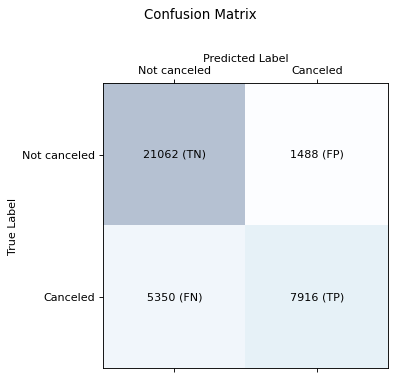

In [33]:
## the helper function originates from week6 WS
# this creates the matplotlib graph to make the confmat look nicer
import warnings 
def pretty_confusion_matrix(confmat, labels, title, labeling=False, highlight_indexes=[]):

    labels_list = [["TN", "FP"], ["FN", "TP"]]
    
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            if labeling:
                label = str(confmat[i, j])+" ("+labels_list[i][j]+")"
            else:
                label = confmat[i, j]
            
            
            if [i,j] in highlight_indexes:
                ax.text(x=j, y=i, s=label, va='center', ha='center',
                        weight = "bold", fontsize=18, color='#32618b')
            else:
                ax.text(x=j, y=i, s=label, va='center', ha='center')
       
    # change the labels
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        ax.set_xticklabels(['']+[labels[0], labels[1]])
        ax.set_yticklabels(['']+[labels[0], labels[1]])
    
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    ax.xaxis.set_label_position('top')
    plt.suptitle(title)
    plt.tight_layout()
    
    plt.show()
    
# use the pretty function to make it nicer, you can give some name for LE.classes_ inside of the function
pretty_confusion_matrix(conf_mat, ["Not canceled","Canceled"], "Confusion Matrix",  labeling = True)

In [34]:
FP = conf_mat[0,1]          
TN = conf_mat[0,0]
TP = conf_mat[1,1]
FN = conf_mat[1,0]

FPR = FP / (FP + TN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)
f1_score = 2 * precision * recall / (precision + recall)

print('False Positive Rate (FPR): '+ '%.3f' % FPR)
print('Recall: '+ '%.3f' % recall)
print('Precision: '+ '%.3f' % precision)
print('F1 Score: '+ '%.3f' % f1_score)



False Positive Rate (FPR): 0.066
Recall: 0.597
Precision: 0.842
F1 Score: 0.698


FPR represents the probability of the original bookings not canceled to be predicted as canceled. And its value is 0.066. 

Recall is the True Positive Rate, for those bookings which are predicted canceled among total truly canceled. Its value is 0.597.

Precision is accuracy for the predicted canceled bookings among truly canceled&not canceled. It's 0.842.

F1 score is the balance for recall and precision. It ranges from 0 to 1. The larger it is, the better performance for the model. Its value is 0.698. So this model is fairly okay but not good enough.

The most important criteria is TP. And then we hope to see FN decrease as much as possible as it measures the actually canceled bookings but was assigned to not canceled. Thus the next step, we need to improve our model to gain a more reasonable Recall value. The best ideal case is that the TP would increase and FN could decrease.

In [35]:
# construct Grid Parameters
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty':['l1', 'l2']
}

from sklearn.model_selection import GridSearchCV
# Perform Grid Search (will take a while to run)
gscv = GridSearchCV(logfit,
                     param_grid,
                     cv = 5,
                     scoring = 'accuracy')
lg = gscv.fit(X_train, y_train)

# gain our best model
best_model = lg.best_estimator_

In [36]:
# the selected optimal hyperparameter configuration
lg.best_params_

{'C': 0.1, 'penalty': 'l1'}

Using cross-validated grid-search method, we found the optimal logistic regression model with its corresponding hyperparameter (norm of penalty & regularization strength) configuration.  
Therefore, our optimal logistic model should be applied 'l1' type of penalty and take the relatively high regularization strength (equal to 0.1).

In [37]:
# roc curve
from sklearn.metrics import roc_curve, precision_recall_curve

predictions = best_model.predict(X_test)
roc_calc = roc_curve(y_true = y_test, y_score = predictions)
#print(roc_calc)

roc = pd.DataFrame(
    data = np.c_[roc_calc],
    columns = ('false positive rate', 'true positive rate', 'threshold')
)

# Values for ROC based on different threshold 
print(roc,"\n")

#Print the related AUC value 
print("AUC value:", roc_auc_score(y_true = y_test, y_score = predictions))

   false positive rate  true positive rate  threshold
0               0.0000            0.000000        2.0
1               0.0651            0.595055        1.0
2               1.0000            1.000000        0.0 

AUC value: 0.7649776248101694


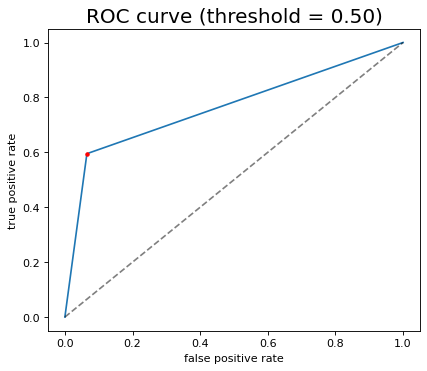

In [38]:
def roc_plot(threshold = 0.5):
    i = (np.abs(roc.threshold - threshold)).idxmin()
    plt.figure(figsize=(6, 5))
    sns.lineplot(x='false positive rate', y='true positive rate', data=roc, ci=None)

    plt.plot([0,1],[0,1], 'k--', alpha=0.5) # 0-1 line 
    plt.plot(roc.iloc[i,0], roc.iloc[i,1], 'r.')

    plt.title("ROC curve (threshold = %.2f)" % threshold, fontsize=18)
    plt.show() 


roc_plot(threshold = 0.5)

Using this data frame, the function above creates the ROC curve (blue), while the remaining code draws the point on the ROC curve that corresponds to the given threshold value (red), and finally the 0-1 line (grey dashed). Closer the ROC curve is to the top left corner, the better our model's performance is.  
Although the ROC is above the grey dashed line, the performance cannot be considered excellent.

In [39]:
# create a dataframe of features and their associated logistic regression coefficients
coef = pd.DataFrame(lg.best_estimator_.coef_[0], X_train.columns)
coef.rename(columns = {0: 'coefficients'}, inplace=True)

# Filtering the ten features with the stongest coefficients 
top_coef = coef[(coef['coefficients'] > 0.5) | (coef['coefficients'] < -0.5)].copy()

# Adding the exponentiated coefficients 
#top_coef['exp'] = np.exp(top_coef['coef'])
# Adding the percent likelihood calculation to interpret the coefficients 
#top_coef['percent'] = (top_coef['exp']-1)*100
top_coef.sort_values('coefficients')

,coefficients
required_car_parking_spaces,-5.720681
type_equal_yes,-0.815464
deposit_type_No Deposit,-0.810785
mkt_Offline TA/TO,-0.752846
total_of_special_requests,-0.722530
is_repeated_guest,-0.591038
meal_FB,0.608667
mkt_Online TA,0.635442
customer_Transient,0.696371
previous_cancellations,2.675482


**Interpretation:**  
Making a non refundable deposit, having a previous booking cancellation, a transient customer are the top 3 most powerful features in predicting that a booking will be canceled. It makes sense that having a history of cancellations would indicate a habit that a customer is more likely to cancel their current booking. In addition, as a single booker, it is more possible that this type of customers would cancel than other types (such as group). However, it is still counterintuitive and unexplainable why non-refundable bookings are the most influential feature in predicting an action of cancellation.  

Requiring car parking spaces, same type between reserved and assigned room and no deposit bookings are the top 3 most powerful features in predicting that a booking will not be canceled. As mentioned in the EDA section, a customer letting the hotel know that they require a parking space (a kind of special request) may be very dependent on this demand so that it will be almost impossible to cancel their reservations. In addition, customers whose rooms' type is not assigned wrong would be more satisfied and less likely to cancel their bookings but the influence of this feature is much weaker than the first one. Finally, it is still hard to explain that customers who do not need to make a deposit are less likely to cancel their bookings.



## 4. Discussion & Conclusions


Review the entire process, based on the dataset, we firstly drew several kinds of plots for illustrating the variables distributions. Then based on our common sense, we dropped several columns as the hotel dataset is giant. Reducing the variables would make our attentions more focus on the major variables. We used ordinal encoder to code the ordered variables such as the type of the room in the hotel. Also, our group used the dummy encoder for the unordered categorical variables.   

Then the most important part, we fit a logistic model for the full model that contains all the continuous numeric variables and columns for categorical variables. The model performs good in the accuracy score and the other metrics, such as False Positive Rate, MSE, AUC criterion. With the help of large linear logistic regression model and grid search method, we selected the best hyperparameters for the penalization and regularization in the logistic regression and extracted some features which have the most weight in predicting whether a booking will be canceled or not.The most outstanding factor is the category of deposit type belongs to "non-refund". Our model predicted that if the deposit is not refundable, keeping other covariates constant, the probability of cancel would be positive associated with this. That is, the not refundable bookings would have a higher probability to be cancelled than other types(no deposit and refundable). However, it is counter to our common sense. Thus, our model do have some drawbacks and some explaination would be consitent to the reality situations. And the times of previous cancellation, and customer type as transient also would be positive related to the probability of cancellation. For the negative side, requiring a car park space could be nice gurantee for not cancel the booking.  


For the background of the hotel, our model could predict the customers behaviours for preserving the hotel bookings or not to some extent. It could in some cases prevent the hotel loss from the predictions. From the confusion matrix, we could manually calculate the loss for the part of wrong predictions if the hotel employs our model as we know the FN values.  

There are some suggestions that the hotel could take to reduce the number of cancellation. First, the hotel could provide more special service to suffice customers' requirements, for example, provide more parking space. Second, try to contact early to customers if some changes occur. Third, decrease the chances that a different type of room is assigned. Finally, for those who already canceled a booking, the hotel could ask for a reason or offer some discounts to try to retain if possible.

Generally speaking, our model has a fairly good prediction accuarcy and will enable the hotel to reduce their loss combined with the early intervention.

## 5. References


-Week 6 Workshop solution  
-https://github.com/JulKelman/Predicting-Hotel-Bookings-Cancellation/blob/3fb6b915982aae3ca2f6d56f1eb05e28fc1e4ddc/code/Project%20Notebook.ipynb  
-https://www.kaggle.com/code/sanjana08/hotel-booking-cancellation-prediction/notebook#FEATURE-ENGINEERING